# Prefix Sum

Prefix sum is a technique that can be used on arrays (of numbers). The idea is to create an array `prefix` where `prefix[i]` is the sum of all elements up to the index `i` (inclusive). For example, given `nums = [5, 2, 1, 6, 3, 8]`, we would have `prefix = [5, 7, 8, 14, 17, 25]`.


**NOTE: When a subarray starts at index `0`, it is considered a "prefix" of the array. A prefix sum represents the sum of all prefixes.**

Prefix sums allow us to find the sum of any subarray in **O(1)**. If we want the sum of the subarray from `i` to `j` (inclusive), then the answer is `prefix[j] - prefix[i - 1]`, or `prefix[j] - prefix[i] + nums[i]` if you don't want to deal with the out of bounds case when `i = 0`.

This works because `prefix[i - 1]` is the sum of all elements **before** index `i`. When you subtract this from the sum of all elements up to index `j`, you are left with the sum of all elements starting at index `i` and ending at index `j`, which is exactly what we are looking for.

![Screenshot 2023-08-15 at 11-52-54 Explore - LeetCode.png](<attachment:Screenshot 2023-08-15 at 11-52-54 Explore - LeetCode.png>)

<hr>
In the above image, we want to find the sum of the subarray highlighted in blue.

If you take all the elements up until the end of the subarray (the green line) and subtract all the elements before it (the red line), you have the subarray.

With a prefix sum, we can find the sum of the green line `25` and red line `11` in constant time and take their difference to find the sum of the subarray as `14`.
<hr>

* Building a prefix sum is very simple. Here's some pseudocode:

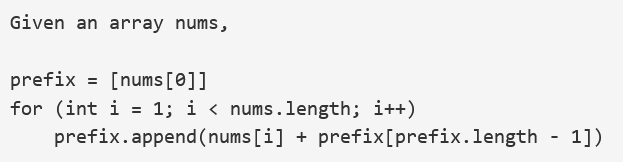

Initially, we start with just the first element. Then we iterate with `i` starting from index `1`. At any given point, the last element of `prefix` will represent the sum of all the elements in the input up to but not including index `i`. So we can add that value plus the current value to the end of `prefix` and continue to the next element.

A prefix sum is a great tool whenever a problem involves sums of a subarray. It only costs **O(n)** to build but allows all future subarray queries to be **O(1)**, so it can usually improve an algorithm's time complexity by a factor of **O(n)**, where nn is the length of the array. Let's look at some examples.


Building a prefix sum is a form of **pre-processing**. Pre-processing is a useful strategy in a variety of problems where we store pre-computed data in a data structure before running the main logic of our algorithm. While it takes some time to pre-process, it's an investment that will save us a huge amount of time during the main parts of the algorithm.



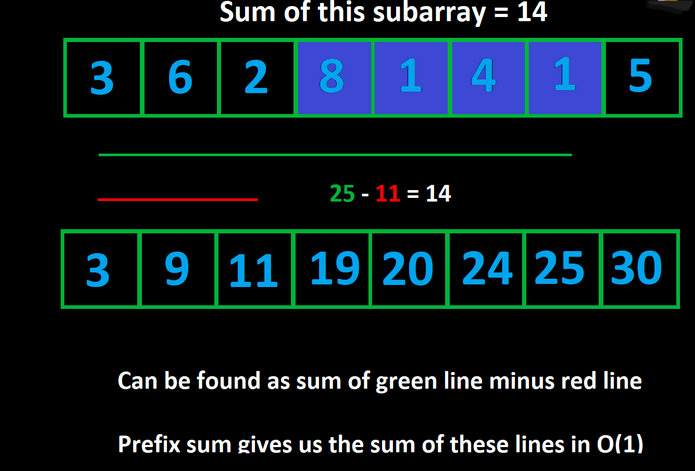



#### Example 1: 
Given an integer array `nums`, an array `queries` where `queries[i] = [x, y]` and an integer `limit`, return a boolean array that represents the answer to each query. A query is `true` if the sum of the subarray from `x` to `y` is less than `limit`, or `false` otherwise.

For example, given `nums = [1, 6, 3, 2, 7, 2]`, `queries = [[0, 3], [2, 5], [2, 4]]`, and `limit = 13`, the answer is `[true, false, true]`. For each query, the subarray sums are `[12, 14, 12]`.


In [ ]:
def answer_queries(nums, queries, limit):
    prefix = [nums[0]]
    for i in range(1, len(nums)):
        prefix.append(nums[i] + prefix[-1])
    
    ans = []
    for x, y in queries:
        curr = prefix[y] - prefix[x] + nums[x]
        ans.append(curr < limit)

    return ans

Without the prefix sum, answering each query would be $O(n)$ in the worst case, where nn is the length of `nums`. If `m = queries.length`, that would give a time complexity of $O(n∗m)$. With the prefix sum, it costs $O(n)$ to build, but then answering each query is $O(1)$. This gives a much better time complexity of $O(n+m)$. We use $O(n)$ space to build the prefix sum.

#### Example 2:



Example 2: [2270. Number of Ways to Split Array](https://leetcode.com/problems/number-of-ways-to-split-array/)

Given an integer array `nums`, find the number of ways to split the array into two parts so that the first section has a sum greater than or equal to the sum of the second section. The second section should have at least one number.

A brute force approach would be to iterate over each index `i` from `0` until `nums.length - 1`. For each index, iterate from `0` to `i` to find the sum of the left section, and then iterate from `i + 1` until the end of the array to find the sum of the right section. This algorithm would have a time complexity of **$O(n^{2})$**.

If we build a prefix sum first, then iterate over each index, we can calculate the sums of the left and right sections in $O(1)$, which would improve the time complexity to $O(n)$.



#### More detailed explaination:

When we split the array into two parts, we are left with two adjacent subarrays. We need to find the sums of these subarrays and compare them.

There are $n−1$ ways to split the array (the right section can't be empty). For each of these splits, it would cost $O(n)$ to iterate over the two subarrays and find their sums.

Instead, we can spend $O(n)$ once to build a prefix sum before trying any splits. Then we can use the prefix sum to perform each of the $n−1$ splits in $O(1)$ time. As we know, with a prefix sum we can calculate the sum of any subarray in $O(1)$.

Let's say we are splitting at index `i`. The left section has all elements in the array up to index `i`, so it has a sum of `prefix[i]`. The right section begins at index `i + 1` and ends at the final index `n - 1`. This means it has a sum of `prefix[n - 1] - prefix[i]`.

#### Code:

In [ ]:
class Solution:
    def waysToSplitArray(self, nums: List[int]) -> int:
        n = len(nums)
        
        prefix = [nums[0]]
        for i in range(1, n):
            prefix.append(nums[i] + prefix[-1])

        ans = 0
        for i in range(n - 1):
            left_section = prefix[i]
            right_section = prefix[-1] - prefix[i]
            if left_section >= right_section:
                ans += 1

        return ans

#### Do we need the array?

In this problem, the order in which we need to access `prefix` is incremental: to find `leftSection`, we do `prefix[i]` as `i` increments by `1` each iteration.

As such, to calculate `leftSection` we don't actually need the array. We can just initialize `leftSection = 0` and then calculate it on the fly by adding the current element to it at each iteration.

What about `rightSection`? By definition, the right section contains all the numbers in the array that aren't in the left section. Therefore, we can pre-compute the sum of the entire input as total, then calculate `rightSection` as `total - leftSection`.

We are still using the concept of a `prefix` sum as each value of `leftSection` represents the sum of a `prefix`. We have simply replicated the functionality using an integer instead of an array.

In [ ]:
class Solution:
    def waysToSplitArray(self, nums: List[int]) -> int:
        ans = left_section = 0
        total = sum(nums)

        for i in range(len(nums) - 1):
            left_section += nums[i]
            right_section = total - left_section
            if left_section >= right_section:
                ans += 1

        return ans

#### 
We have improved the space complexity to $O(1)$, which is a great improvement.